<a href="https://colab.research.google.com/github/omsharma-001/Deep_Learning_Computer_Vision_Models/blob/main/CNN_Food_Vision_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()




--2023-05-18 11:56:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.196.128, 173.194.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   244MB/s    in 0.4s    

2023-05-18 11:56:43 (244 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  print(random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

3335267.jpg
Image shape: (384, 512, 3)


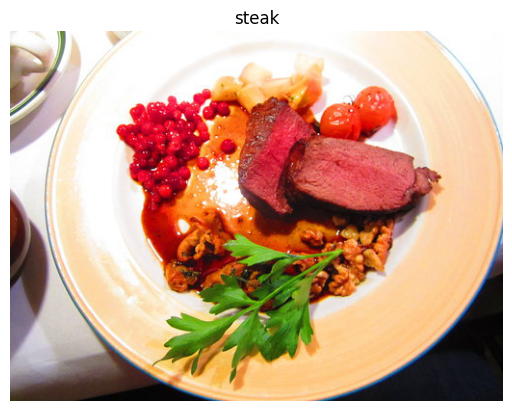

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory = train_dir, batch_size = 32, target_size = (224,224), class_mode = "binary", seed = 42)
test_data = valid_datagen.flow_from_directory(directory = test_dir,  batch_size = 32, target_size = (224,224), class_mode = "binary", seed = 42 )
train_data[0][0]

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


array([[[[0.42352945, 0.43137258, 0.34509805],
         [0.31764707, 0.3254902 , 0.2392157 ],
         [0.26666668, 0.28235295, 0.18431373],
         ...,
         [0.42352945, 0.34901962, 0.37254903],
         [0.427451  , 0.34901962, 0.39607847],
         [0.45098042, 0.36862746, 0.427451  ]],

        [[0.2901961 , 0.30588236, 0.21568629],
         [0.45882356, 0.47450984, 0.37647063],
         [0.2627451 , 0.28627452, 0.18431373],
         ...,
         [0.39607847, 0.34117648, 0.34117648],
         [0.4156863 , 0.36862746, 0.37647063],
         [0.39607847, 0.34901962, 0.3647059 ]],

        [[0.37254903, 0.39607847, 0.29411766],
         [0.39607847, 0.41960788, 0.31764707],
         [0.30588236, 0.34117648, 0.23529413],
         ...,
         [0.34509805, 0.3254902 , 0.3019608 ],
         [0.30980393, 0.29803923, 0.27058825],
         [0.3372549 , 0.3254902 , 0.30588236]],

        ...,

        [[0.5137255 , 0.5019608 , 0.54509807],
         [0.52156866, 0.50980395, 0.54509807]

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 10, activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2, padding = "valid"),
    tf.keras.layers.Conv2D(10,3, activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = "sigmoid")
    ])
model_1.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])
history = model_1.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 45s 618ms/step - loss: 0.5690 - accuracy: 0.7053 - val_loss: 0.4302 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 11s 224ms/step - loss: 0.4519 - accuracy: 0.8040 - val_loss: 0.4116 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4369 - accuracy: 0.8080 - val_loss: 0.4060 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 13s 273ms/step - loss: 0.4289 - accuracy: 0.8107 - val_loss: 0.4121 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 19s 406ms/step - loss: 0.3800 - accuracy: 0.8353 - val_loss: 0.3707 - val_accuracy: 0.8440


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 215, 215, 10)      3010      
                                                                 
 conv2d_1 (Conv2D)           (None, 213, 213, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 106, 106, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 104, 104, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 102, 102, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 51, 51, 10)       0         
 2D)                                                    

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(10, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
model_2.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.01), metrics = ["accuracy"])
model_2.fit(train_data, epochs = 5, validation_data = test_data)

Epoch 1/5
47/47 [==============================] - 13s 243ms/step - loss: 5.0134 - accuracy: 0.6593 - val_loss: 1.1657 - val_accuracy: 0.7360
Epoch 2/5
47/47 [==============================] - 12s 261ms/step - loss: 1.6251 - accuracy: 0.6807 - val_loss: 3.0334 - val_accuracy: 0.6120
Epoch 3/5
47/47 [==============================] - 11s 239ms/step - loss: 1.0516 - accuracy: 0.7520 - val_loss: 1.3073 - val_accuracy: 0.6680
Epoch 4/5
47/47 [==============================] - 10s 216ms/step - loss: 1.0070 - accuracy: 0.7420 - val_loss: 1.9785 - val_accuracy: 0.6440
Epoch 5/5
47/47 [==============================] - 14s 293ms/step - loss: 1.7905 - accuracy: 0.7413 - val_loss: 1.9725 - val_accuracy: 0.5940


1392718.jpg
Image shape: (512, 512, 3)
3324050.jpg
Image shape: (512, 512, 3)


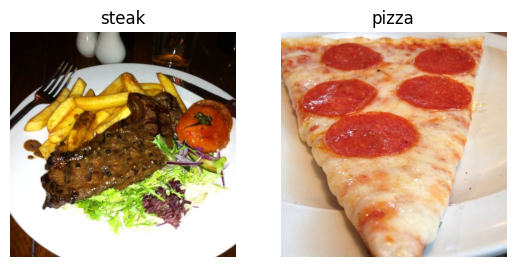

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")

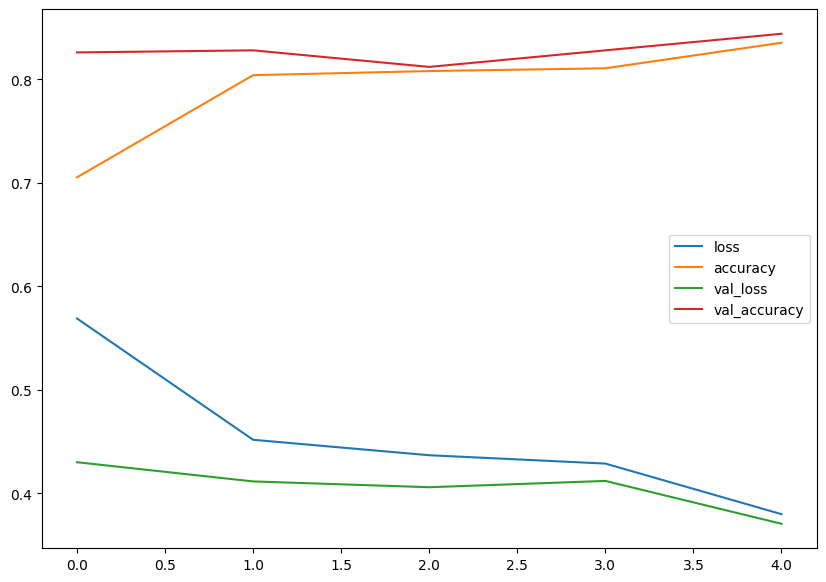

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize = (10,7));

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

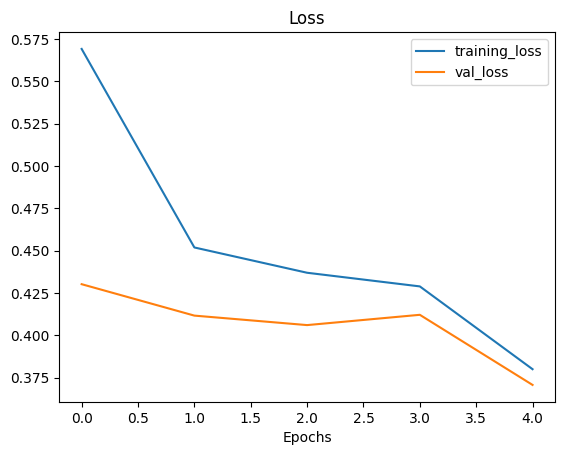

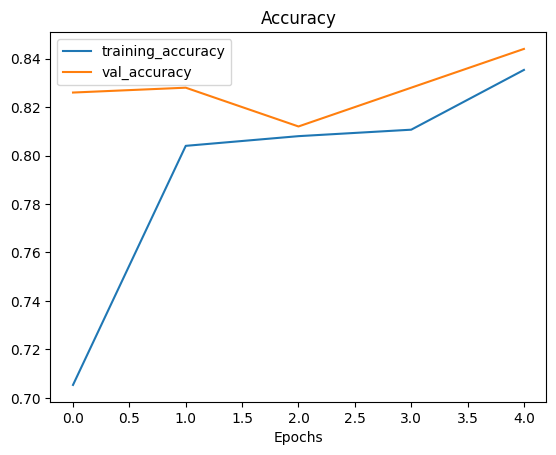

In [ ]:
plot_loss_curves(history)

In [ ]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size = 2),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_5.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])
history_2 = model_5.fit(train_data, epochs = 5, validation_data = test_data)

Epoch 1/5
47/47 [==============================] - 16s 288ms/step - loss: 0.6423 - accuracy: 0.7047 - val_loss: 0.4447 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 13s 279ms/step - loss: 0.4326 - accuracy: 0.8120 - val_loss: 0.3909 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 15s 325ms/step - loss: 0.3742 - accuracy: 0.8367 - val_loss: 0.3990 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 19s 396ms/step - loss: 0.3113 - accuracy: 0.8747 - val_loss: 0.3752 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 17s 357ms/step - loss: 0.2063 - accuracy: 0.9287 - val_loss: 0.5497 - val_accuracy: 0.7640


In [ ]:
model_5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 flatten_2 (Flatten)         (None, 27040)            

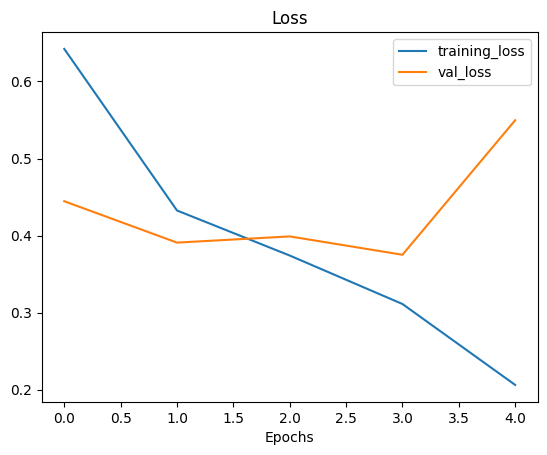

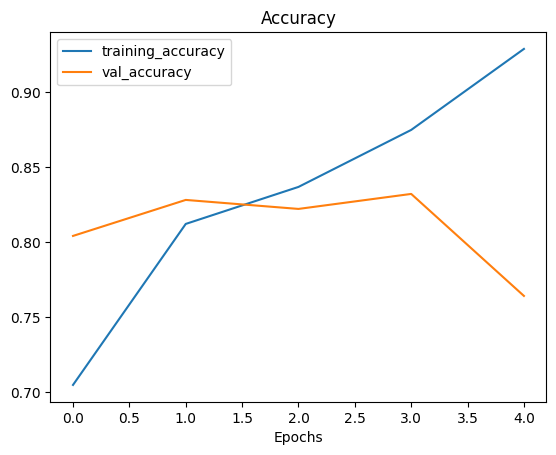

In [ ]:
plot_loss_curves(history_2)

Data Augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True,
                                             ) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)


# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same
images_2, labels_2 = test_data.next()


4

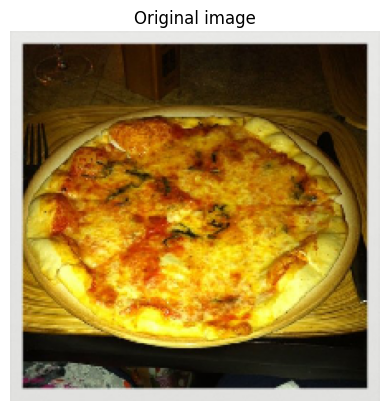

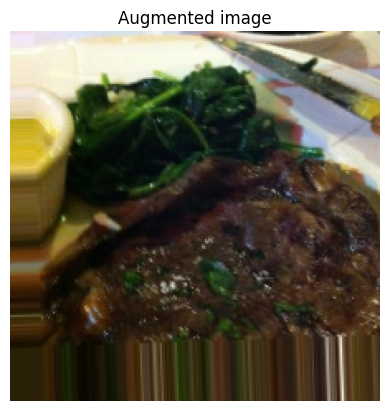

In [ ]:
# Show original image and augmented image

random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg



--2023-05-18 12:01:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2023-05-18 12:01:14 (32.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

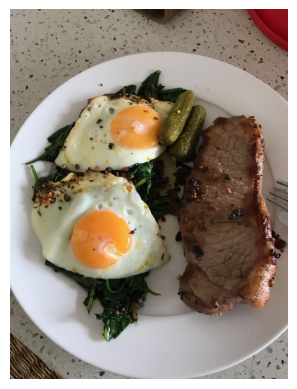

In [ ]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape


(4032, 3024, 3)

In [ ]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 10, activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 10, activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

model_6.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])
history = model_6.fit(train_data_augmented_shuffled, epochs = 5, validation_data=test_data)

Epoch 1/5
47/47 [==============================] - 27s 514ms/step - loss: 0.7569 - accuracy: 0.5073 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 24s 516ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 30s 637ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 32s 691ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 24s 514ms/step - loss: 0.6928 - accuracy: 0.5347 - val_loss: 0.6934 - val_accuracy: 0.5640


In [ ]:
def load_and_prep_image(filename, img_shape =224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255
  return img







In [ ]:
steak = tf.expand_dims(load_and_prep_image("03-steak.jpeg", ), axis = 0)
pred = model_6.predict(steak)

1/1 [==============================] - 0s 40ms/step


In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-05-18 12:27:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-05-18 12:27:21 (41.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 32ms/step


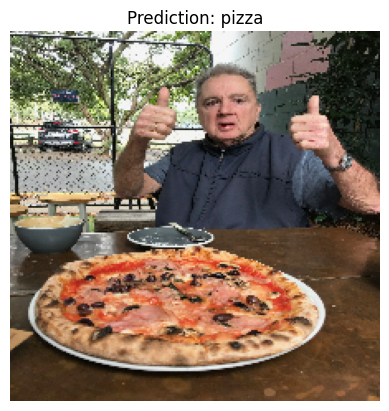

In [ ]:
pred_and_plot(model_6,"03-pizza-dad.jpeg",class_names)

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()


--2023-05-18 18:41:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.253.122.128, 172.253.63.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   130MB/s    in 3.6s    

2023-05-18 18:41:16 (138 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in '{dirpath}' ")

There are 2 directories and 0 in '10_food_classes_all_data' 
There are 10 directories and 0 in '10_food_classes_all_data/train' 
There are 0 directories and 750 in '10_food_classes_all_data/train/sushi' 
There are 0 directories and 750 in '10_food_classes_all_data/train/ice_cream' 
There are 0 directories and 750 in '10_food_classes_all_data/train/chicken_wings' 
There are 0 directories and 750 in '10_food_classes_all_data/train/pizza' 
There are 0 directories and 750 in '10_food_classes_all_data/train/grilled_salmon' 
There are 0 directories and 750 in '10_food_classes_all_data/train/fried_rice' 
There are 0 directories and 750 in '10_food_classes_all_data/train/chicken_curry' 
There are 0 directories and 750 in '10_food_classes_all_data/train/hamburger' 
There are 0 directories and 750 in '10_food_classes_all_data/train/steak' 
There are 0 directories and 750 in '10_food_classes_all_data/train/ramen' 
There are 10 directories and 0 in '10_food_classes_all_data/test' 
There are 0 dire

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir, target_size = (224,224), batch_size = 32, class_mode = "categorical")
test_data = test_datagen.flow_from_directory(test_dir, target_size = (224,224), batch_size = 32, class_mode = "categorical" )

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
model_8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu", input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.Conv2D(filters = 10, kernel_size = 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(10, activation ="softmax")
])
model_8.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.001), metrics = ["accuracy"])
history = model_8.fit(train_data, epochs = 5, validation_data = test_data)

Epoch 1/5
200/235 [========================>.....] - ETA: 1:28 - loss: 2.2318 - accuracy: 0.1677

KeyboardInterrupt: ignored